# Finding the Best Algorithm to Predict Heart Attacks

By Enoch Ngan

## Project Goal:

The Heart Attack Analysis & Prediction Dataset by RASHIK RAHMAN on Kaggle provides a vital dataset on medical information for patients with low and high chances of heart attack. By analyzing the learning algorithms, Decision Trees (DT), Logistic Regression (LR), and k-Nearest Neighbors (KNN), we can develop a predictive model that determines the best algorithm for this dataset. This project was inspired by TANAYA TIPRE's analysis on the same dataset, and can be found on Kaggle under Heart Attack Prediction - LR, SVM, KNN, DT. 

## Key

__Age__ : Age of the patient

__Sex__ : Sex of the patient

__exang__: exercise induced angina (1 = yes; 0 = no)

__ca__: number of major vessels (0-3)

__cp__: Chest Pain type chest pain type

__Value 1__: typical angina
__Value 2__: atypical angina
__Value 3__: non-anginal pain
__Value 4__: asymptomatic
__trtbps__: resting blood pressure (in mm Hg)

__chol__: cholestoral in mg/dl fetched via BMI sensor

__fbs__: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

__rest_ecg__: resting electrocardiographic results

__Value 0__: normal
__Value 1__: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
__Value 2__: showing probable or definite left ventricular hypertrophy by Estes' criteria
__thalach__: maximum heart rate achieved

__target__: 0= less chance of heart attack 1= more chance of heart attack

## Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Data Validation

In [56]:
df = pd.read_csv("heart.csv") # loads up the data
df.head() # displays the first 5 rows of df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df.info() # shows the info of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data Cleansing

In [36]:
df.isnull().sum() # checks for any missing values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [37]:
cat_col = ['sex','exng','caa','cp','fbs','restecg','slp','thall'] # categorical columns 
con_col = ["age","trtbps","chol","thalachh","oldpeak"] # continuous columns

df = pd.get_dummies(df, columns = cat_col, drop_first = True) # encodes categorical columns

X = df.drop(['output'],axis=1) # defines features
y = df[['output']] # defines target 

scaler = RobustScaler() # instantiates the scalar

X[con_col] = scaler.fit_transform(X[con_col]) # scales teh continuous features
X

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


Creates training and testing splits

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify = y, random_state= 42)
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Comparing Accuracies: DT v LR v KNN

## Classifier Decision Tree

In [51]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42) # instantiates the dt classifier with 42 random state

decision_tree_classifier.fit(X_train, y_train) # fits the model on the training data

decision_tree_predictions = decision_tree_classifier.predict(X_test) # predicts the test data

decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions) # generates the confusion matrix
print("Confusion Matrix:\n")
print(decision_tree_confusion_matrix) # displays the confusion matrix

decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_predictions) # calculates the test accuracy
print(f"\nDecision Tree Accuracy: {decision_tree_test_accuracy * 100:.2f}%") # prints the test accuracy

Confusion Matrix:

[[19  9]
 [ 4 29]]

Decision Tree Accuracy: 78.69%


## Logistic Regression

In [48]:
logistic_model = LogisticRegression() # instantiates the logistic regression model

logistic_model.fit(X_train, y_train.values.ravel()) # fits the model to the training data

predictions = logistic_model.predict(X_test) # predicts the target values for test

conf_matrix = confusion_matrix(y_test, predictions) # calculates confusion matrix
print("Confusion Matrix: \n")
print(conf_matrix)

test_accuracy = accuracy_score(y_test, predictions) * 100 # calculates test accuracy
print(f"\nLogistic Regression Accuracy: {test_accuracy:.2f}%")

Confusion Matrix: 

[[23  5]
 [ 3 30]]

Logistic Regression Accuracy: 86.89%


## K-Nearest Neighbors Classifier

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=10) # instantiates k-neighbors classifer with 10 neighbors

knn_classifier.fit(X_train, y_train.values.ravel())# fits the model with the training data

knn_predictions = knn_classifier.predict(X_test) # predicts the testing data

knn_confusion_matrix = confusion_matrix(y_test, knn_predictions) # generates and displays the confusion matrix

print("Confusion Matrix: \n")
print(knn_confusion_matrix)

knn_test_accuracy = accuracy_score(y_test, knn_predictions) * 100 # calculates the test accuracy
print(f"\nK-Neighbors Classifier Accuracy: {knn_test_accuracy:.2f}%\n") # displays the test accuracy

print("Classification Report: \n")
print(classification_report(y_test, knn_predictions)) # prints the classification report for precision, recall, f1-score, and accuracy

Confusion Matrix: 

[[22  6]
 [ 6 27]]

K-Neighbors Classifier Accuracy: 80.33%

Classification Report: 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Hyperparameter tunning

After deducting that logistic regression is the most accurate, we want to tune the hyperparameters to find which set produce the best accuracy. 

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# sets up the parameters for hyperparameter tuning
hyperparameters = { 
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2']
}

logistic_regression = LogisticRegression() # initializes the logistic regression classifier

# defines a custom scoring metric based on accuracy
def accuracy_scorer(estimator, X, y): 
    predictions = estimator.predict(X)
    return accuracy_score(y, predictions)

# executes a grid search to find the optimal hyperparameters
grid_search_cv = GridSearchCV(estimator=logistic_regression, param_grid=hyperparameters, cv=5, scoring=accuracy_scorer)
grid_search_cv.fit(X_train, y_train)

# extracts the best hyperparameters
optimal_parameters = grid_search_cv.best_params_

# accesses the best logistic regression model found by grid search
optimal_model = grid_search_cv.best_estimator_

# determines the model's accuracy on the test set
test_set_accuracy = optimal_model.score(X_test, y_test)
print(f"The Final Model Accuracy on Test Set is: {test_set_accuracy:.4f}")
print(f"Optimal Hyperparameters: ", optimal_parameters)

The Final Model Accuracy on Test Set is: 0.8525
Optimal Hyperparameters:  {'C': 10, 'penalty': 'l2'}


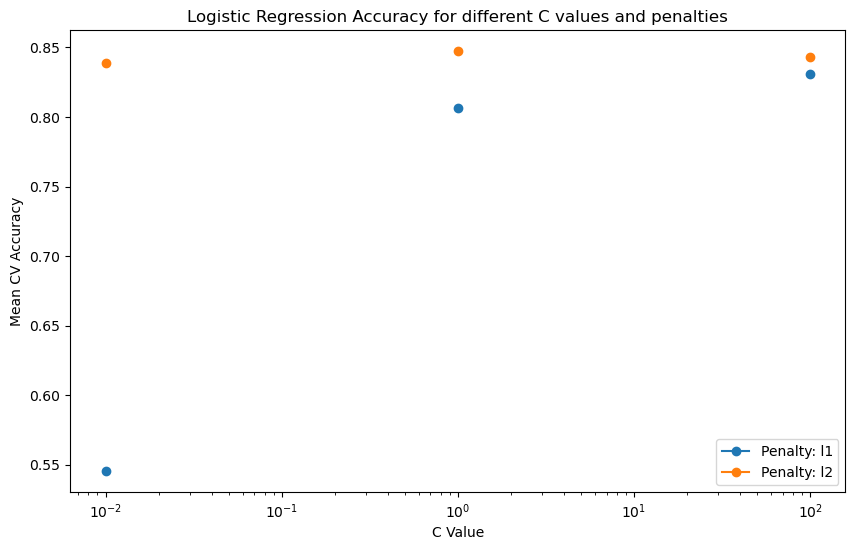

In [61]:
# extracting mean test scores
mean_test_scores = grid_search_cv.cv_results_['mean_test_score']

# creates a meshgrid to plot the scores
C_values, penalty_values = np.meshgrid(hyperparameters['C'], hyperparameters['penalty'])

# reshapes mean_test_scores to match the grid shape
scores_matrix = mean_test_scores.reshape(C_values.shape)

# graphs the relationship
fig, ax = plt.subplots(figsize=(10, 6))
for idx, penalty in enumerate(hyperparameters['penalty']):
    ax.plot(hyperparameters['C'], scores_matrix[idx, :], label=f'Penalty: {penalty}', marker='o', linestyle='-')
ax.set_xlabel('C Value')
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('C values vs penalties')
ax.set_xscale('log')  # log scale is more appropriate due to C values
ax.legend()
plt.show()

## Findings:

The best algorithm to for future predictions of heart attacks of a patient would be to use Logistic Regression. 